In [163]:
import matplotlib.pyplot as plt
import re

# 获取所有类名
all_class_names = [
    'background', 'building', 'fence', 'person', 'pole', 
    'road', 'sidewalk', 'vegetation', 'car', 'wall', 'traffic sign'
]

def parse_log_file(file_path):
    results = {}
    results['mIoU'] = {}
    for class_name in all_class_names:
        results[class_name] = {}

    with open(file_path, 'r') as file:
        lines = file.readlines()

    for i, line in enumerate(lines):
        # 提取 epoch 和 mean_IoU
        # epoch_match = re.search(r'Current epoch:(\d+)\s+mIoU:\s+([\d.]+)', line)
        # Current epoch:20 mIoU: 56.44 Best mIoU: 56.44
        epoch_match = re.search(r'Current epoch:(\d+)\s+mIoU:\s+([\d.]+)\s+Best mIoU:\s+([\d.]+)', line)
        if epoch_match:
            epoch = int(epoch_match.group(1))
            mean_iou = float(epoch_match.group(2))
            best_miou = float(epoch_match.group(3))
            results['mIoU'][epoch] = mean_iou
            results['Best_mIoU'] = best_miou


        # 提取每一类的结果
        class_match = re.match(r'(\d+)\s+([\w\s]+)\s+([\d.]+)\s+([\d.]+)', line)
        if class_match:
            class_id = int(class_match.group(1))
            class_name = class_match.group(2).strip()  # 去除多余的空格
            iou = float(class_match.group(3))
            acc = float(class_match.group(4))
            epoch_line_index = i + (12 - class_id)

            if epoch_line_index < len(lines):
                epoch_line = lines[epoch_line_index]
                epoch_match = re.search(r'== Epoch:\s+(\d+)\s+mean_IoU\s+([\d.]+)', epoch_line)
                if epoch_match:
                    epoch = int(epoch_match.group(1))
                    results[class_name][epoch] = {'iou': iou, 'acc': acc}

    return results

# Define the file path
results_dicts = {}
import os
file_dir = '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/'
# file_dir下所有以rgb_day_11_2024开头的文件
# file_paths = sorted(os.path.join(file_dir, file) for file in os.listdir(file_dir) if file.startswith('rgb_day_11_2024'))
file_paths = [
    # # rgb_t + event_t ➡️ seg_{t+1} train from strach 69.18
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_ie/rgbe_day_11_20241005_154538_train.log',
    # # rgb_{t} ➡️ seg_{t+1} train from strach 66.72
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241005_181400_train.log',
    # # rgb_t ➡️ seg_{t+1} FRMA num_flow=1 lr/10 frozen segformer 
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241014_184051_train.log',
    # # rgb_t ➡️ seg_{t+1} FRMA num_flow=4 lr/10 frozen segformer 
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241014_230458_train.log',
    # # 1️⃣ rgb_t + flow_t ➡️ seg_{t+1} lr/10 train softsplat 63.18
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241015_024633_train.log',
    # # 2️⃣ rgb_t + flow_t ➡️ seg_{t+1} lr/10 train softsplat          , with feature_after residual feature_before 63.59
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241015_024827_train.log',
    # # 3️⃣ rgb_t + flow_t ➡️ seg_{t+1} lr/10 train softsplat & decoder 64.64
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241015_025023_train.log',
    # # 4️⃣ rgb_t + flow_t ➡️ seg_{t+1} lr/10 train softsplat & decoder, with feature_after residual feature_before 64.78
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241015_025203_train.log',
    # # 5️⃣ rgb_t + flow_t ➡️ seg_{t+1} lr  softsplat & decoder, with feature_after residual feature_before 67.92
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241015_145340_train.log',
    # # 6️⃣ rgb_t + flow_t ➡️ seg_{t+1} lr  softsplat & decoder, with feature_after residual feature_before no feature loss 67.88
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241015_145435_train.log',
    # # # 1_1: only rgb_f_warp before refine net 021351 / 024125 68.03
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241016_024125_train.log', 
    # # 1_2: only rgb_f_warp before refine net , using netSoftmetric 033022 70.58
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241016_033022_train.log',
    # # 2: cancate rgb_f & rgb_f_warp before refine net 024209 67.85
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241016_024209_train.log', 
    # # 3: cancate event_f & rgb_f & meticone before softsplat, using netSoftmetric 031944 
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241016_201106_train.log',
    # # 4_1: cancate event_f & rgb_f & rgb_f_warp before refine net 031314 70.03
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241016_031314_train.log',
    # # 4_2: cancate event_f & rgb_f & rgb_f_warp before refine net, using netSoftmetric 031944 70.62
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241016_031944_train.log',
    # # only F before softsplat, F' into refinenet
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241017_043904_train.log',
    # # only F before softsplat, F'+F into refinenet
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241017_043911_train.log',
    # # only F before softsplat, F'+E into refinenet
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241017_043919_train.log',
    # # only F before softsplat, F'+E+F into refinenet
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241017_043925_train.log',
    # # [F, w] [F, w]+[F', w']
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241017_171212_train.log',
    # # [F, w] [F', w'] with photometric loss
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241017_171318_train.log',
    # # [F, w] [F', w'] with photometric loss; random forward backward
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241017_181536_train.log',
    # # unfrozen backbone
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241017_235818_train.log',
    # # forward flow then backward img
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241018_012800_train.log',
    # # use 7 para for metric
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241018_144152_train.log',
    # # 6e-5
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241018_153205_train.log',
    # # 8e-5
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241018_153538_train.log',
    # # 8e-5 lr for forward splat 70.8
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241018_215427_train.log',
    # # 1e-4 lr for forward splat 70.86
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241019_011739_train.log',
    # # 1e-4 lr for forward splat + more conv 71.64
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241019_011919_train.log',
    # # 1e-4 lr for forward splat + more conv + sigmoid
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241019_020450_train.log',
    # # 1e-4 lr for forward splat + sigmoid + rgb
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241019_024034_train.log',
    # 1e-4 lr for forward splat + more more conv bs 6*2 400 epoch 71.74
    '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241019_143233_train.log',
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241020_150052_train.log',
    # #  1e-4 lr for forward splat + more more conv  bs 8*2 400 epoch 71.66
    '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241019_185028_train.log',
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241020_144920_train.log',
    # 1e-4 lr for forward splat + more more conv 200 epoch
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241019_080516_train.log',
    # # 1e-4 lr for forward splat + more more more conv 400 epoch
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241019_080612_train.log',
    # # 1.5e-4 lr for forward splat + more more conv 400 epoch power 0.9 warmup 5 bs 16*2
    '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241020_161301_train.log',
    # # 1e-4 lr more-more conv, epoch 200, bs 6*2; power 0.85 warm 10 
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241020_073436_train.log',
    # # 1e-4 lr more-more conv, epoch 200, bs 6*2; power 0.85 warm 5
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241020_073452_train.log',
    # # 1e-4 lr more-more conv, epoch 200, bs 6*2; power 0.90 warm 10 cos scheduler
    # '/home/xiaoshan/work/adap_v/DELIVER/output/DSEC_CMNeXt-B2_i/rgb_day_11_20241020_073904_train.log',
]
for file_path in file_paths:
    parts = file_path.split('/')
    filename = parts[-1]
    # scene = filename.split('_')[:2]
    # scene = '_'.join(scene)
    # print(scene)

    # Initialize an empty dictionary to store the results
    results_dict = parse_log_file(file_path)
    results_dicts[filename] = results_dict

In [161]:
# len(results_dicts['rgbe_day']['wall']), results_dicts['rgbe_day']['wall'].values()
results_dicts.keys()


dict_keys(['rgb_day_11_20241019_143233_train.log', 'rgb_day_11_20241019_185028_train.log', 'rgb_day_11_20241020_161301_train.log'])

scene:  rgb_day_11_20241019_143233_train.log max mIoU:  71.74 max epoch:  252
scene:  rgb_day_11_20241019_185028_train.log max mIoU:  71.66 max epoch:  256
scene:  rgb_day_11_20241020_161301_train.log max mIoU:  71.06 max epoch:  141


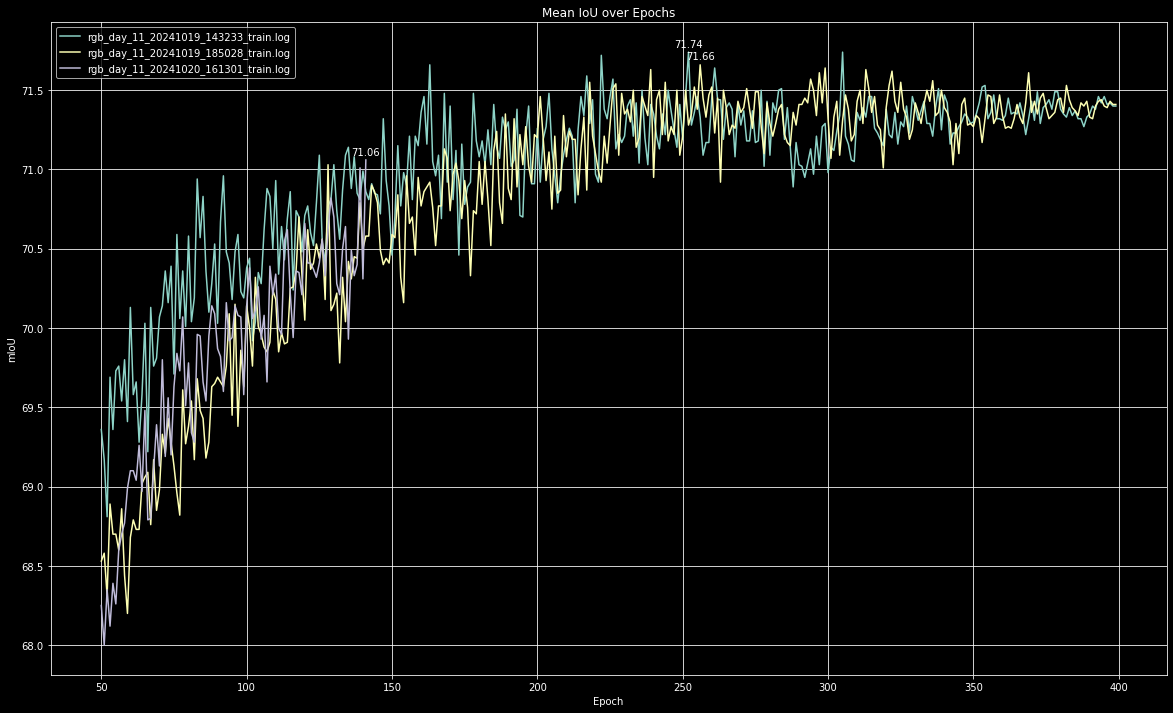

In [164]:
import matplotlib.pyplot as plt

# # 定义线型和颜色
# line_styles = {
#     'rgb_day': ('-', '#FFD700'),  # 深黄色
#     'rgb_night': ('-', '#0000FF'),  # 深蓝色
#     'rgbe_day': ('--', '#FFFFE0'),  # 浅黄色
#     'rgbe_night': ('--', '#ADD8E6'),  # 浅蓝色
#     'rgb_all': ('-', '#FF0000'),  # 红色
#     'rgbe_all': ('--', '#FFA07A')  # 浅红色
# }

# 可视化 mean_IoU
fig, ax = plt.subplots(figsize=(20, 12))  # 设置图片大小为 12x8 英寸
for scene, results_dict in results_dicts.items():
    # 从 epoch 50 开始提取数据
    # filtered_results = {epoch: miou for epoch, miou in results_dict['mIoU'].items() if epoch >= 50}
    filtered_results = {epoch: miou for epoch, miou in results_dict['mIoU'].items() if epoch <= 400 and epoch >= 50}
    if not filtered_results:
        continue
    # if filtered_results[100] < 55:
    #     continue
    epochs = list(filtered_results.keys())
    mIoUs = list(filtered_results.values())
    
    # 找到最高点
    # max_miou = results_dict['Best_mIoU']
    max_miou = max(mIoUs)
    max_epoch = epochs[mIoUs.index(max_miou)]
    
    print("scene: ", scene, "max mIoU: ", max_miou, "max epoch: ", max_epoch)
    # line_style, color = line_styles.get(scene, ('-', 'black'))
    # ax.plot(epochs, mIoUs, label=scene, linestyle=line_style, color=color)
    ax.plot(epochs, mIoUs, label=scene)
    
    # 标注最高点
    ax.annotate(f'{max_miou:.2f}', xy=(max_epoch, max_miou), xytext=(max_epoch, max_miou + 0.02),
                # color=color,
                horizontalalignment='center', verticalalignment='bottom')

# 添加网格线
ax.grid(True)

ax.legend()
ax.set_xlabel('Epoch')
ax.set_ylabel('mIoU')
plt.title('Mean IoU over Epochs')
plt.show()

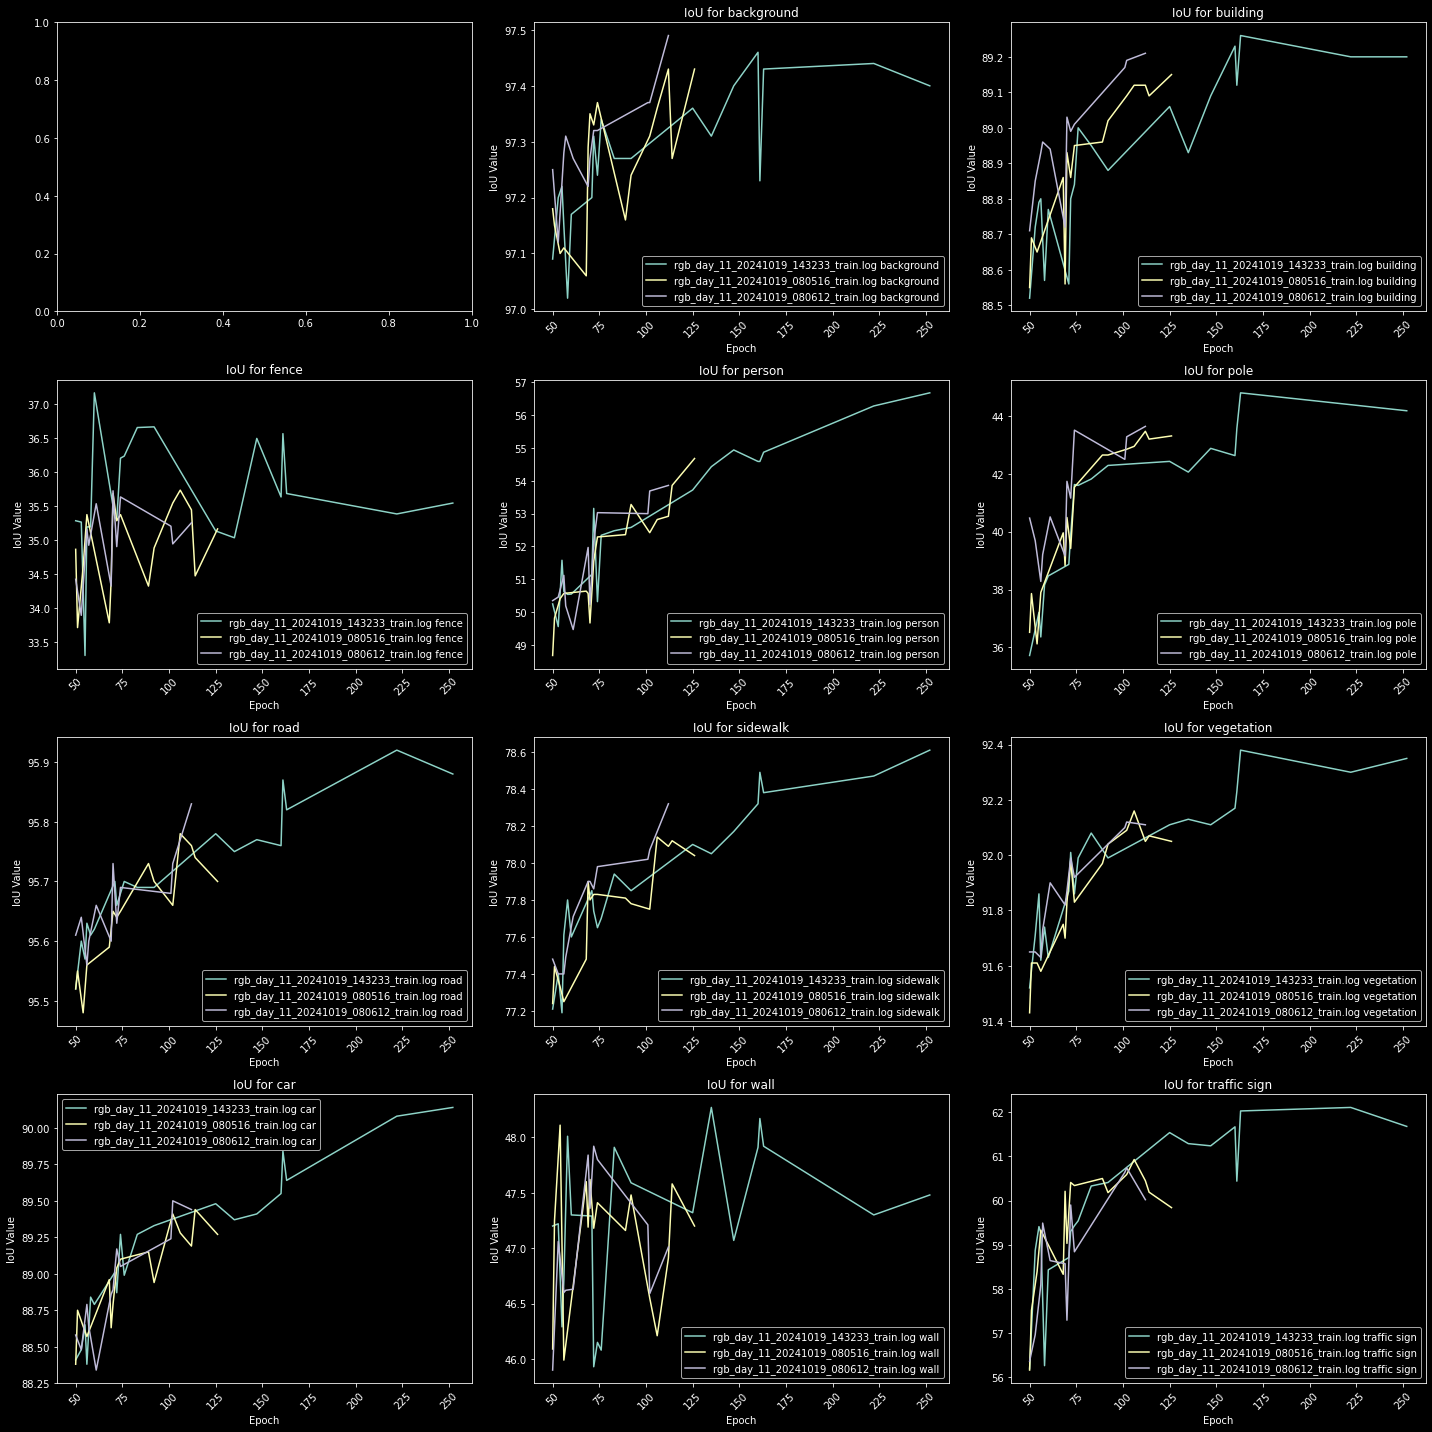

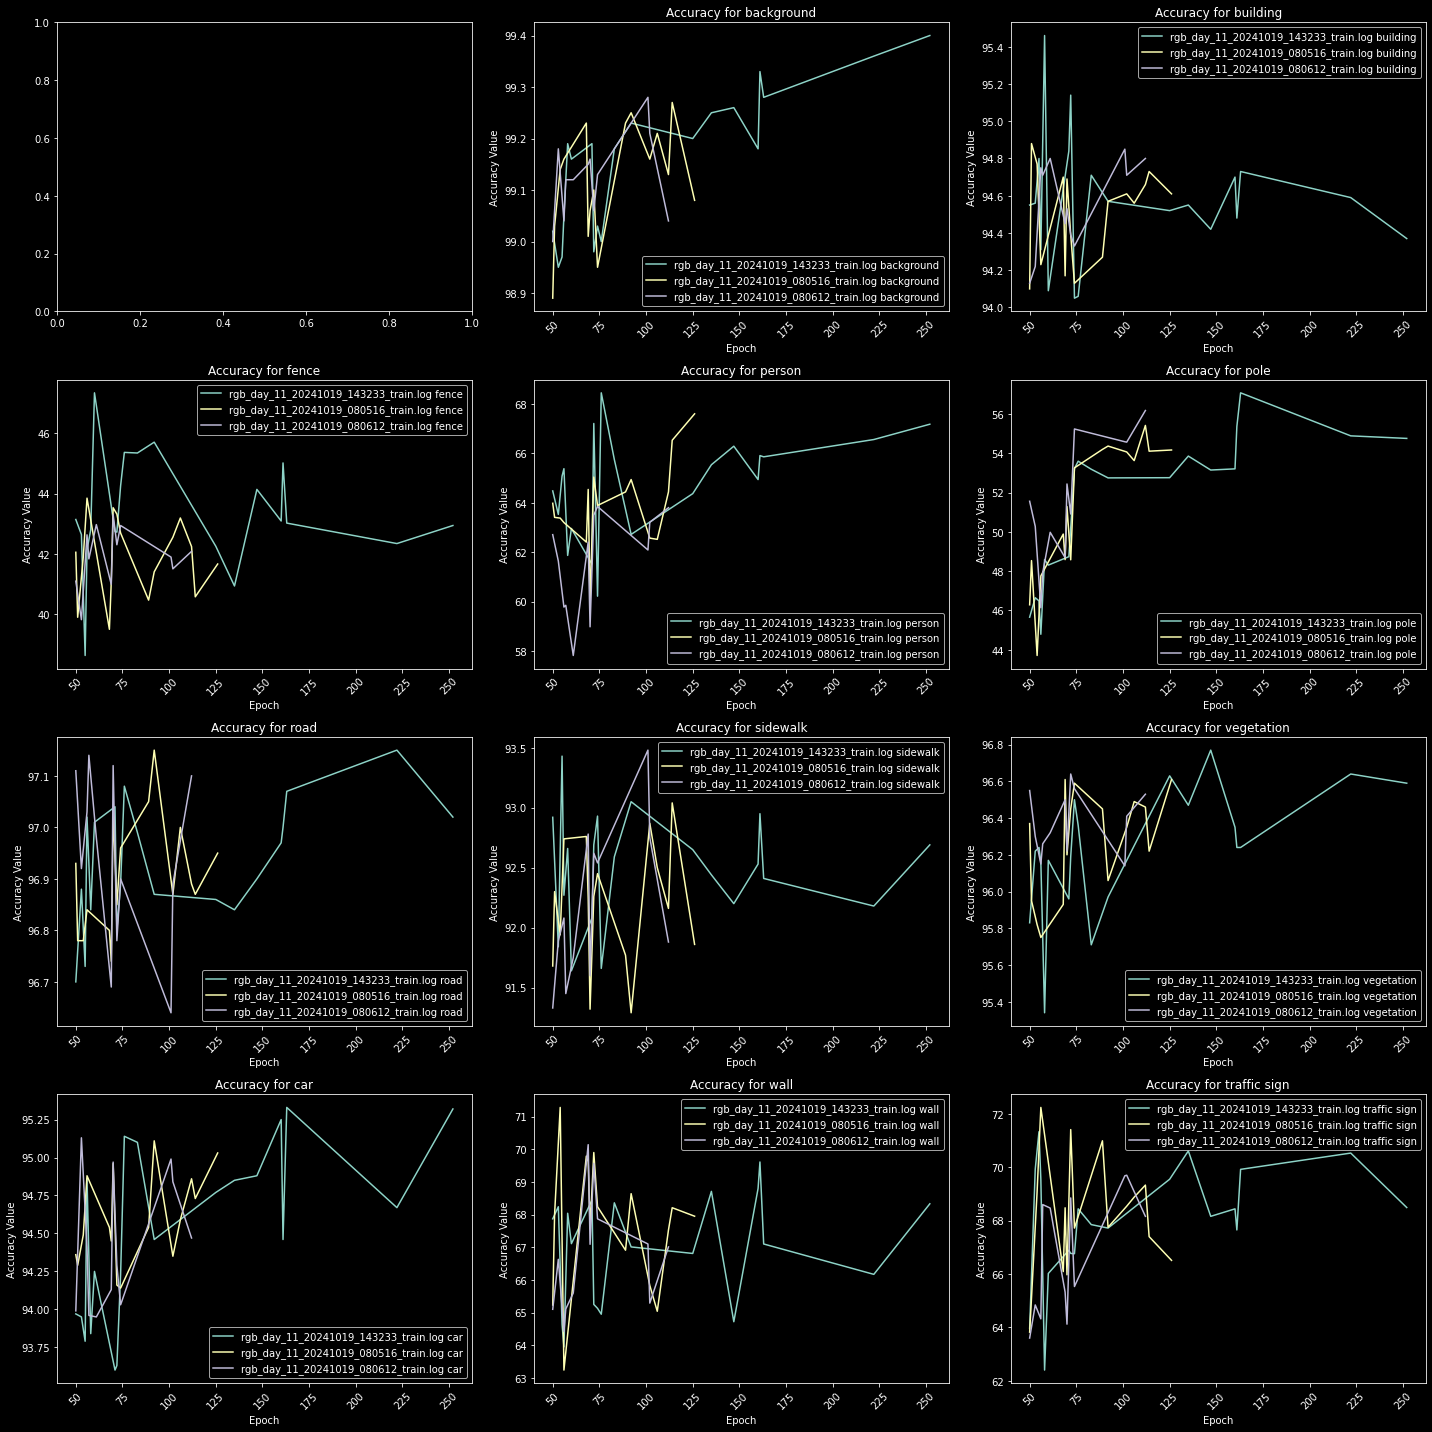

In [107]:

# Determine the number of classes
num_classes = len(all_class_names)
num_cols = 3
num_rows = (num_classes + num_cols - 1) // num_cols

# Plot all IoU training curves in a single figure with subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
axs = axs.flatten()

for idx, class_name in enumerate(all_class_names, start=1):
    for scene, results_dict in results_dicts.items():
        class_results = results_dict[class_name]
        # 从 epoch 50 开始提取数据
        filtered_class_results = {epoch: reults for epoch, reults in class_results.items() if epoch >= 50}
        epochs = list(filtered_class_results.keys())
        ious = [filtered_class_results[e]['iou'] for e in epochs]
        # line_style, color = line_styles.get(scene, ('-', 'black'))
        # axs[idx].plot(epochs, ious, label=f'{scene} {class_name}', linestyle=line_style, color=color)
        axs[idx].plot(epochs, ious, label=f'{scene} {class_name}')
    axs[idx].set_title(f'IoU for {class_name}')
    axs[idx].set_xlabel('Epoch')
    axs[idx].set_ylabel('IoU Value')
    axs[idx].legend()
    axs[idx].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for i in range(idx + 1, len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

# Plot all Accuracy training curves in a single figure with subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
axs = axs.flatten()

for idx, class_name in enumerate(all_class_names, start=1):
    for scene, results_dict in results_dicts.items():
        class_results = results_dict[class_name]
        # 从 epoch 50 开始提取数据
        filtered_class_results = {epoch: reults for epoch, reults in class_results.items() if epoch >= 50}
        epochs = list(filtered_class_results.keys())
        accs = [filtered_class_results[e]['acc'] for e in epochs]
        # line_style, color = line_styles.get(scene, ('-', 'black'))
        # axs[idx].plot(epochs, accs, label=f'{scene} {class_name}', linestyle=line_style, color=color)
        axs[idx].plot(epochs, accs, label=f'{scene} {class_name}')
    axs[idx].set_title(f'Accuracy for {class_name}')
    axs[idx].set_xlabel('Epoch')
    axs[idx].set_ylabel('Accuracy Value')
    axs[idx].legend()
    axs[idx].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for i in range(idx + 1, len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

In [2]:
hist_rgbe_all2night = [
        [6.8129e+06, 4.7253e+04, 0.0000e+00, 2.0000e+00, 2.9450e+03, 3.1000e+01, 4.3000e+01, 2.0554e+05, 2.6000e+01, 2.0000e+00, 1.0600e+03],
        [6.2944e+04, 1.8612e+07, 1.6080e+04, 3.6950e+03, 6.9954e+04, 1.3700e+03, 6.9420e+04, 1.9908e+06, 6.2589e+04, 6.7675e+04, 2.0168e+04],
        [0.0000e+00, 1.5051e+05, 4.0009e+05, 4.9300e+02, 7.6840e+03, 5.3580e+03, 3.1430e+03, 9.6812e+04, 2.2906e+04, 4.2310e+04, 2.4200e+02],
        [0.0000e+00, 1.0245e+04, 3.6600e+02, 1.1834e+05, 8.6000e+01, 6.7130e+03, 4.7240e+03, 1.9875e+04, 1.8146e+04, 2.5530e+03, 4.8000e+01],
        [6.6940e+03, 8.1427e+04, 2.5090e+03, 1.3300e+02, 3.4019e+05, 3.4760e+03, 1.3760e+04, 8.1805e+04, 4.0780e+03, 1.9824e+04, 3.3880e+03],
        [3.1000e+01, 2.0493e+04, 5.1600e+02, 5.2580e+03, 6.0380e+03, 2.9966e+07, 3.5451e+05, 5.6197e+04, 7.9750e+04, 5.1739e+04, 1.0000e+02],
        [0.0000e+00, 1.7560e+04, 4.1400e+03, 4.3460e+03, 1.2148e+04, 5.2163e+05, 5.8244e+06, 1.6001e+05, 3.9853e+04, 9.1955e+04, 4.8000e+01],
        [2.0962e+05, 1.1125e+06, 4.0730e+04, 5.2910e+03, 5.0701e+04, 7.0427e+04, 2.7318e+05, 2.2693e+07, 3.3392e+04, 1.1008e+05, 7.3280e+03],
        [0.0000e+00, 8.4345e+04, 7.5000e+03, 1.1138e+04, 4.8210e+03, 6.9815e+04, 2.3541e+04, 1.0122e+05, 3.9782e+06, 1.1542e+04, 2.3100e+02],
        [0.0000e+00, 6.8884e+04, 5.6458e+04, 1.9420e+03, 1.1182e+04, 6.8450e+03, 1.3297e+05, 1.9555e+05, 1.4312e+04, 1.9404e+06, 0.0000e+00],
        [1.9400e+02, 3.9785e+04, 0.0000e+00, 8.0000e+01, 9.5800e+02, 1.6000e+01, 3.6900e+02, 3.3268e+04, 1.7900e+02, 5.5400e+02, 1.9500e+05]
        ]
hist_rgbe_all2day = [
    [1.3572e+07, 1.3479e+04, 2.1670e+03, 0.0000e+00, 1.3638e+04, 0.0000e+00,
         0.0000e+00, 3.6431e+04, 1.2000e+01, 0.0000e+00, 1.5640e+03],
        [8.0719e+04, 1.3600e+07, 6.3944e+04, 1.6100e+03, 5.5138e+04, 1.2400e+02,
         1.9532e+04, 3.4129e+05, 1.8828e+04, 5.3891e+04, 2.7270e+04],
        [1.4810e+03, 3.4182e+05, 3.9036e+05, 6.9600e+02, 1.4516e+04, 1.1830e+03,
         3.3562e+04, 8.4634e+04, 3.7848e+04, 1.3584e+05, 2.2100e+02],
        [0.0000e+00, 5.1520e+03, 7.0100e+02, 9.7620e+04, 4.1000e+02, 1.5400e+02,
         6.1210e+03, 1.4483e+04, 1.1339e+04, 9.1500e+02, 2.8200e+02],
        [3.5818e+04, 1.2198e+05, 1.1321e+04, 7.9000e+02, 4.8762e+05, 3.3340e+03,
         1.5193e+04, 9.2528e+04, 1.1735e+04, 7.4130e+03, 9.4160e+03],
        [0.0000e+00, 3.3550e+03, 6.1800e+02, 1.3700e+02, 4.0800e+03, 2.7933e+07,
         6.7406e+05, 1.3078e+04, 5.5989e+04, 3.5070e+03, 3.1600e+02],
        [0.0000e+00, 1.5073e+04, 7.3960e+03, 3.1010e+03, 9.5490e+03, 2.4520e+05,
         5.1698e+06, 8.3200e+04, 2.1818e+04, 2.3190e+04, 3.6000e+01],
        [7.8356e+04, 2.2561e+05, 2.7134e+04, 2.7130e+03, 3.6703e+04, 6.9528e+04,
         7.7490e+04, 1.8182e+07, 1.6232e+04, 1.6774e+04, 8.4860e+03],
        [2.1510e+03, 1.3851e+05, 2.8330e+03, 9.9660e+03, 6.2460e+03, 1.5972e+04,
         8.4500e+03, 4.3463e+04, 4.0603e+06, 1.1610e+03, 1.3040e+03],
        [6.7500e+02, 6.4274e+04, 3.3428e+04, 2.9800e+02, 4.2160e+03, 7.7600e+03,
         3.0269e+04, 8.4026e+04, 2.2586e+04, 3.6755e+05, 1.3000e+01],
        [9.3920e+03, 4.9757e+04, 3.7000e+01, 1.0900e+02, 5.7330e+03, 1.0050e+03,
         7.3600e+02, 1.4986e+04, 1.8070e+03, 1.3900e+02, 2.6514e+05]
]
hist_rgbe_all2all = [[2.0385e+07, 6.0734e+04, 2.1670e+03, 2.0000e+00, 1.6580e+04, 3.1000e+01,
         4.3000e+01, 2.4197e+05, 3.8000e+01, 2.0000e+00, 2.6240e+03],
        [1.4366e+05, 3.2212e+07, 8.0030e+04, 5.3070e+03, 1.2509e+05, 1.4940e+03,
         8.8950e+04, 2.3321e+06, 8.1421e+04, 1.2157e+05, 4.7439e+04],
        [1.4810e+03, 4.9232e+05, 7.9046e+05, 1.1880e+03, 2.2201e+04, 6.5410e+03,
         3.6708e+04, 1.8144e+05, 6.0754e+04, 1.7815e+05, 4.6300e+02],
        [0.0000e+00, 1.5398e+04, 1.0670e+03, 2.1596e+05, 4.9600e+02, 6.8680e+03,
         1.0846e+04, 3.4358e+04, 2.9487e+04, 3.4670e+03, 3.3000e+02],
        [4.2513e+04, 2.0341e+05, 1.3830e+04, 9.2300e+02, 8.2782e+05, 6.8090e+03,
         2.8951e+04, 1.7433e+05, 1.5813e+04, 2.7235e+04, 1.2804e+04],
        [3.1000e+01, 2.3848e+04, 1.1340e+03, 5.3940e+03, 1.0119e+04, 5.7899e+07,
         1.0286e+06, 6.9276e+04, 1.3574e+05, 5.5249e+04, 4.1600e+02],
        [0.0000e+00, 3.2634e+04, 1.1535e+04, 7.4470e+03, 2.1697e+04, 7.6683e+05,
         1.0994e+07, 2.4321e+05, 6.1668e+04, 1.1514e+05, 8.4000e+01],
        [2.8798e+05, 1.3381e+06, 6.7864e+04, 8.0030e+03, 8.7407e+04, 1.3996e+05,
         3.5067e+05, 4.0875e+07, 4.9624e+04, 1.2685e+05, 1.5814e+04],
        [2.1510e+03, 2.2284e+05, 1.0334e+04, 2.1102e+04, 1.1069e+04, 8.5787e+04,
         3.1992e+04, 1.4469e+05, 8.0385e+06, 1.2703e+04, 1.5350e+03],
        [6.7500e+02, 1.3316e+05, 8.9885e+04, 2.2410e+03, 1.5402e+04, 1.4603e+04,
         1.6324e+05, 2.7957e+05, 3.6896e+04, 2.3079e+06, 1.3000e+01],
        [9.5850e+03, 8.9546e+04, 3.7000e+01, 1.8900e+02, 6.6900e+03, 1.0210e+03,
         1.1050e+03, 4.8249e+04, 1.9860e+03, 6.9300e+02, 4.6014e+05]]

In [7]:
import torch
hist_rgbe_all2night = torch.Tensor(hist_rgbe_all2night)
hist_rgbe_all2day = torch.Tensor(hist_rgbe_all2day)
hist_rgbe_all2all = torch.Tensor(hist_rgbe_all2all)

hist_rgbe_all2night + hist_rgbe_all2day - hist_rgbe_all2all

tensor([[-100.,   -2.,    0.,    0.,    3.,    0.,    0.,    1.,    0.,    0.,
            0.],
        [   3.,    0.,   -6.,   -2.,    2.,    0.,    2.,  -10.,   -4.,   -4.,
           -1.],
        [   0.,   10.,  -10.,    1.,   -1.,    0.,   -3.,    6.,    0.,    0.,
            0.],
        [   0.,   -1.,    0.,    0.,    0.,   -1.,   -1.,    0.,   -2.,    1.,
            0.],
        [  -1.,   -3.,    0.,    0.,  -10.,    1.,    2.,    3.,    0.,    2.,
            0.],
        [   0.,    0.,    0.,    1.,   -1.,    0.,  -30.,   -1.,   -1.,   -3.,
            0.],
        [   0.,   -1.,    1.,    0.,    0.,    0.,  200.,    0.,    3.,    5.,
            0.],
        [  -4.,   10.,    0.,    1.,   -3.,   -5.,    0.,    0.,    0.,    4.,
            0.],
        [   0.,   15.,   -1.,    2.,   -2.,    0.,   -1.,   -7.,    0.,    0.,
            0.],
        [   0.,   -2.,    1.,   -1.,   -4.,    2.,   -1.,    6.,    2.,   50.,
            0.],
        [   1.,   -4.,    0.,    0.,    

In [11]:
def compute_iou(hist):
    ious = hist.diag() / (hist.sum(0) + hist.sum(1) - hist.diag())
    ious[ious.isnan()]=0.
    miou = ious.mean().item()
    # miou = ious[~ious.isnan()].mean().item()
    ious *= 100
    miou *= 100
    return ious, miou

In [12]:
ious_rgbe_all2night, miou_rgbe_all2night = compute_iou(hist_rgbe_all2night)
ious_rgbe_all2day, miou_rgbe_all2day = compute_iou(hist_rgbe_all2day)
ious_rgb2_add, miou_rgb2_add = compute_iou(hist_rgbe_all2night + hist_rgbe_all2day)
ious_rgbe_all2all, miou_rgbe_all2all = compute_iou(hist_rgbe_all2all)
print(miou_rgbe_all2night, miou_rgbe_all2day)
print(miou_rgb2_add, miou_rgbe_all2all)

72.69604802131653 73.01937341690063
73.29253554344177 73.29251766204834


In [14]:
# 获取所有类名
all_class_names = [
    'background', 'building', 'fence', 'person', 'pole', 
    'road', 'sidewalk', 'vegetation', 'car', 'wall', 'traffic sign'
]
print(ious_rgbe_all2night)
print(ious_rgbe_all2day)
# print(ious_rgb2_add)
print(ious_rgbe_all2all)

tensor([92.7015, 82.3187, 46.6389, 55.4353, 47.0005, 95.9639, 77.1265, 82.3782,
        87.0964, 68.6435, 64.3530])
tensor([98.0078, 89.2309, 32.7555, 62.3384, 51.4705, 96.2132, 80.2294, 93.0066,
        90.4591, 42.8417, 66.6601])
tensor([96.1681, 85.1020, 38.5668, 58.3561, 49.5348, 96.0840, 78.5547, 86.7899,
        88.7631, 62.6356, 65.6627])
